In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean, cosine, cityblock


def kmeans_clustering(data, n_clusters, distance_metric):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    if distance_metric == 'euclidean':
        dist = euclidean
    elif distance_metric == 'cosine':
        dist = cosine
    elif distance_metric == 'manhattan':
        dist = cityblock
    else:
        raise ValueError(f"Invalid distance metric: {distance_metric}")

    silhouette_avg = silhouette_score(data, cluster_labels, metric=dist)

    return silhouette_avg


def run_experiment(dataset, distance_metrics, ks, n_splits=5):
    X, y = dataset.data, dataset.target
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]

        for k in ks:
            for distance_metric in distance_metrics:
                silhouette_avg = kmeans_clustering(X_test, k, distance_metric)
                results.append({
                    'k': k,
                    'distance_metric': distance_metric,
                    'silhouette_score': silhouette_avg
                })

    results_df = pd.DataFrame(results)
    return results_df.groupby(['k', 'distance_metric']).mean().reset_index()


# Load Wine dataset
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

# Print sample dataset
wine_df = pd.DataFrame(X, columns=wine_data.feature_names)
wine_df['target'] = y
print("Sample Wine dataset:")
print(wine_df.head())

# Define distance metrics and range of k
distance_metrics = ['euclidean', 'cosine', 'manhattan']
ks = range(2, 11)

# Run experiments
wine_results = run_experiment(wine_data, distance_metrics, ks)

# Print results
print("Wine dataset results:")
print(wine_results)


Sample Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Wine dataset results:
     k distance_metric  silhouette_score
0    2          cosine          0.517946
1    2       euclidean          0.664892
2    2       manhattan          0.642043
3    3          cosine          0.445720
4    3       euclidean          0.586913
5    3       manhattan          0.553046
6    4          cosine          0.286915
7    4       euclidean          0.575231
8    4       manhattan          0.534691
9    5          cosine          0.111873
10   5       euclidean          0.601533
11   5       manhattan          0.555936
12   6          cosine          0.077434
13   6       euclidean          0.612171
14   6       manhattan          0.558942
15   7          cosine         -0.020357
16   7       euclidean          0.604940
17   7       manhattan          0.544931
18   8          cosine         -0.000274
19   8       euclidean          0.584337
20   8       manhattan          0.518872
21   9          cosine         -0.073914
22   9       euclidean          0.5

/Users/syedreehan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [2]:
# Print results
print("Wine dataset results:")
print(wine_results)

Wine dataset results:
     k distance_metric  silhouette_score
0    2          cosine          0.517946
1    2       euclidean          0.664892
2    2       manhattan          0.642043
3    3          cosine          0.445720
4    3       euclidean          0.586913
5    3       manhattan          0.553046
6    4          cosine          0.286915
7    4       euclidean          0.575231
8    4       manhattan          0.534691
9    5          cosine          0.111873
10   5       euclidean          0.601533
11   5       manhattan          0.555936
12   6          cosine          0.077434
13   6       euclidean          0.612171
14   6       manhattan          0.558942
15   7          cosine         -0.020357
16   7       euclidean          0.604940
17   7       manhattan          0.544931
18   8          cosine         -0.000274
19   8       euclidean          0.584337
20   8       manhattan          0.518872
21   9          cosine         -0.073914
22   9       euclidean          0.5

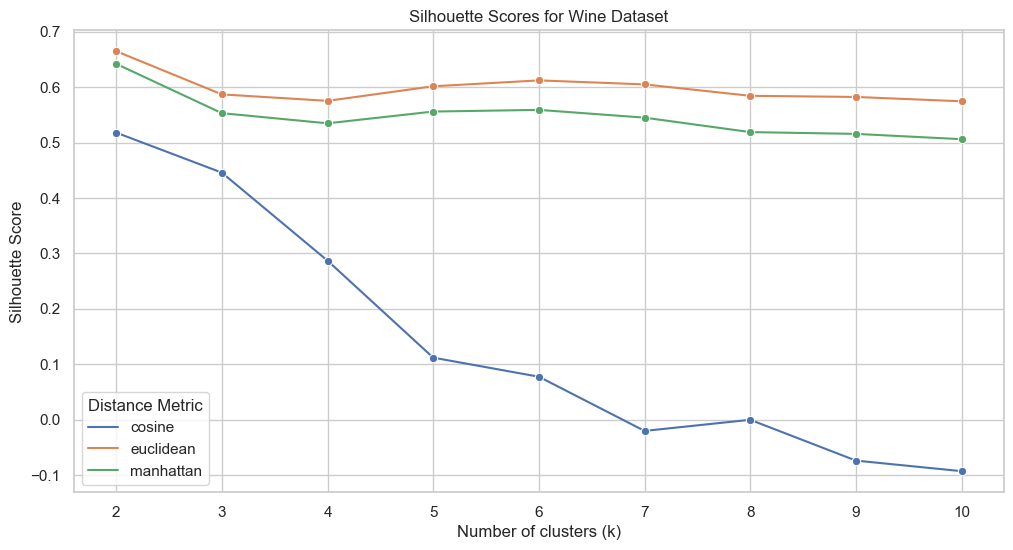

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the results
def plot_results(results_df, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    ax = sns.lineplot(
        x="k",
        y="silhouette_score",
        hue="distance_metric",
        data=results_df,
        marker="o",
        palette="deep",
    )

    ax.set(xlabel="Number of clusters (k)", ylabel="Silhouette Score")
    plt.title(title)
    plt.legend(title="Distance Metric")
    plt.show()


# Plot the results for the Wine dataset
plot_results(wine_results, "Silhouette Scores for Wine Dataset")


In [4]:
wine_df = pd.DataFrame(X, columns=wine_data.feature_names)
wine_df['target'] = y
print("Sample Wine dataset:")
print(wine_df.head())

Sample Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean, cosine, cityblock

# Load Wine dataset
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

# Print sample dataset
wine_df = pd.DataFrame(X, columns=wine_data.feature_names)
wine_df['target'] = y
print("Sample Wine dataset:")
print(wine_df.head())

# ... (rest of the code, same as before)


Sample Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

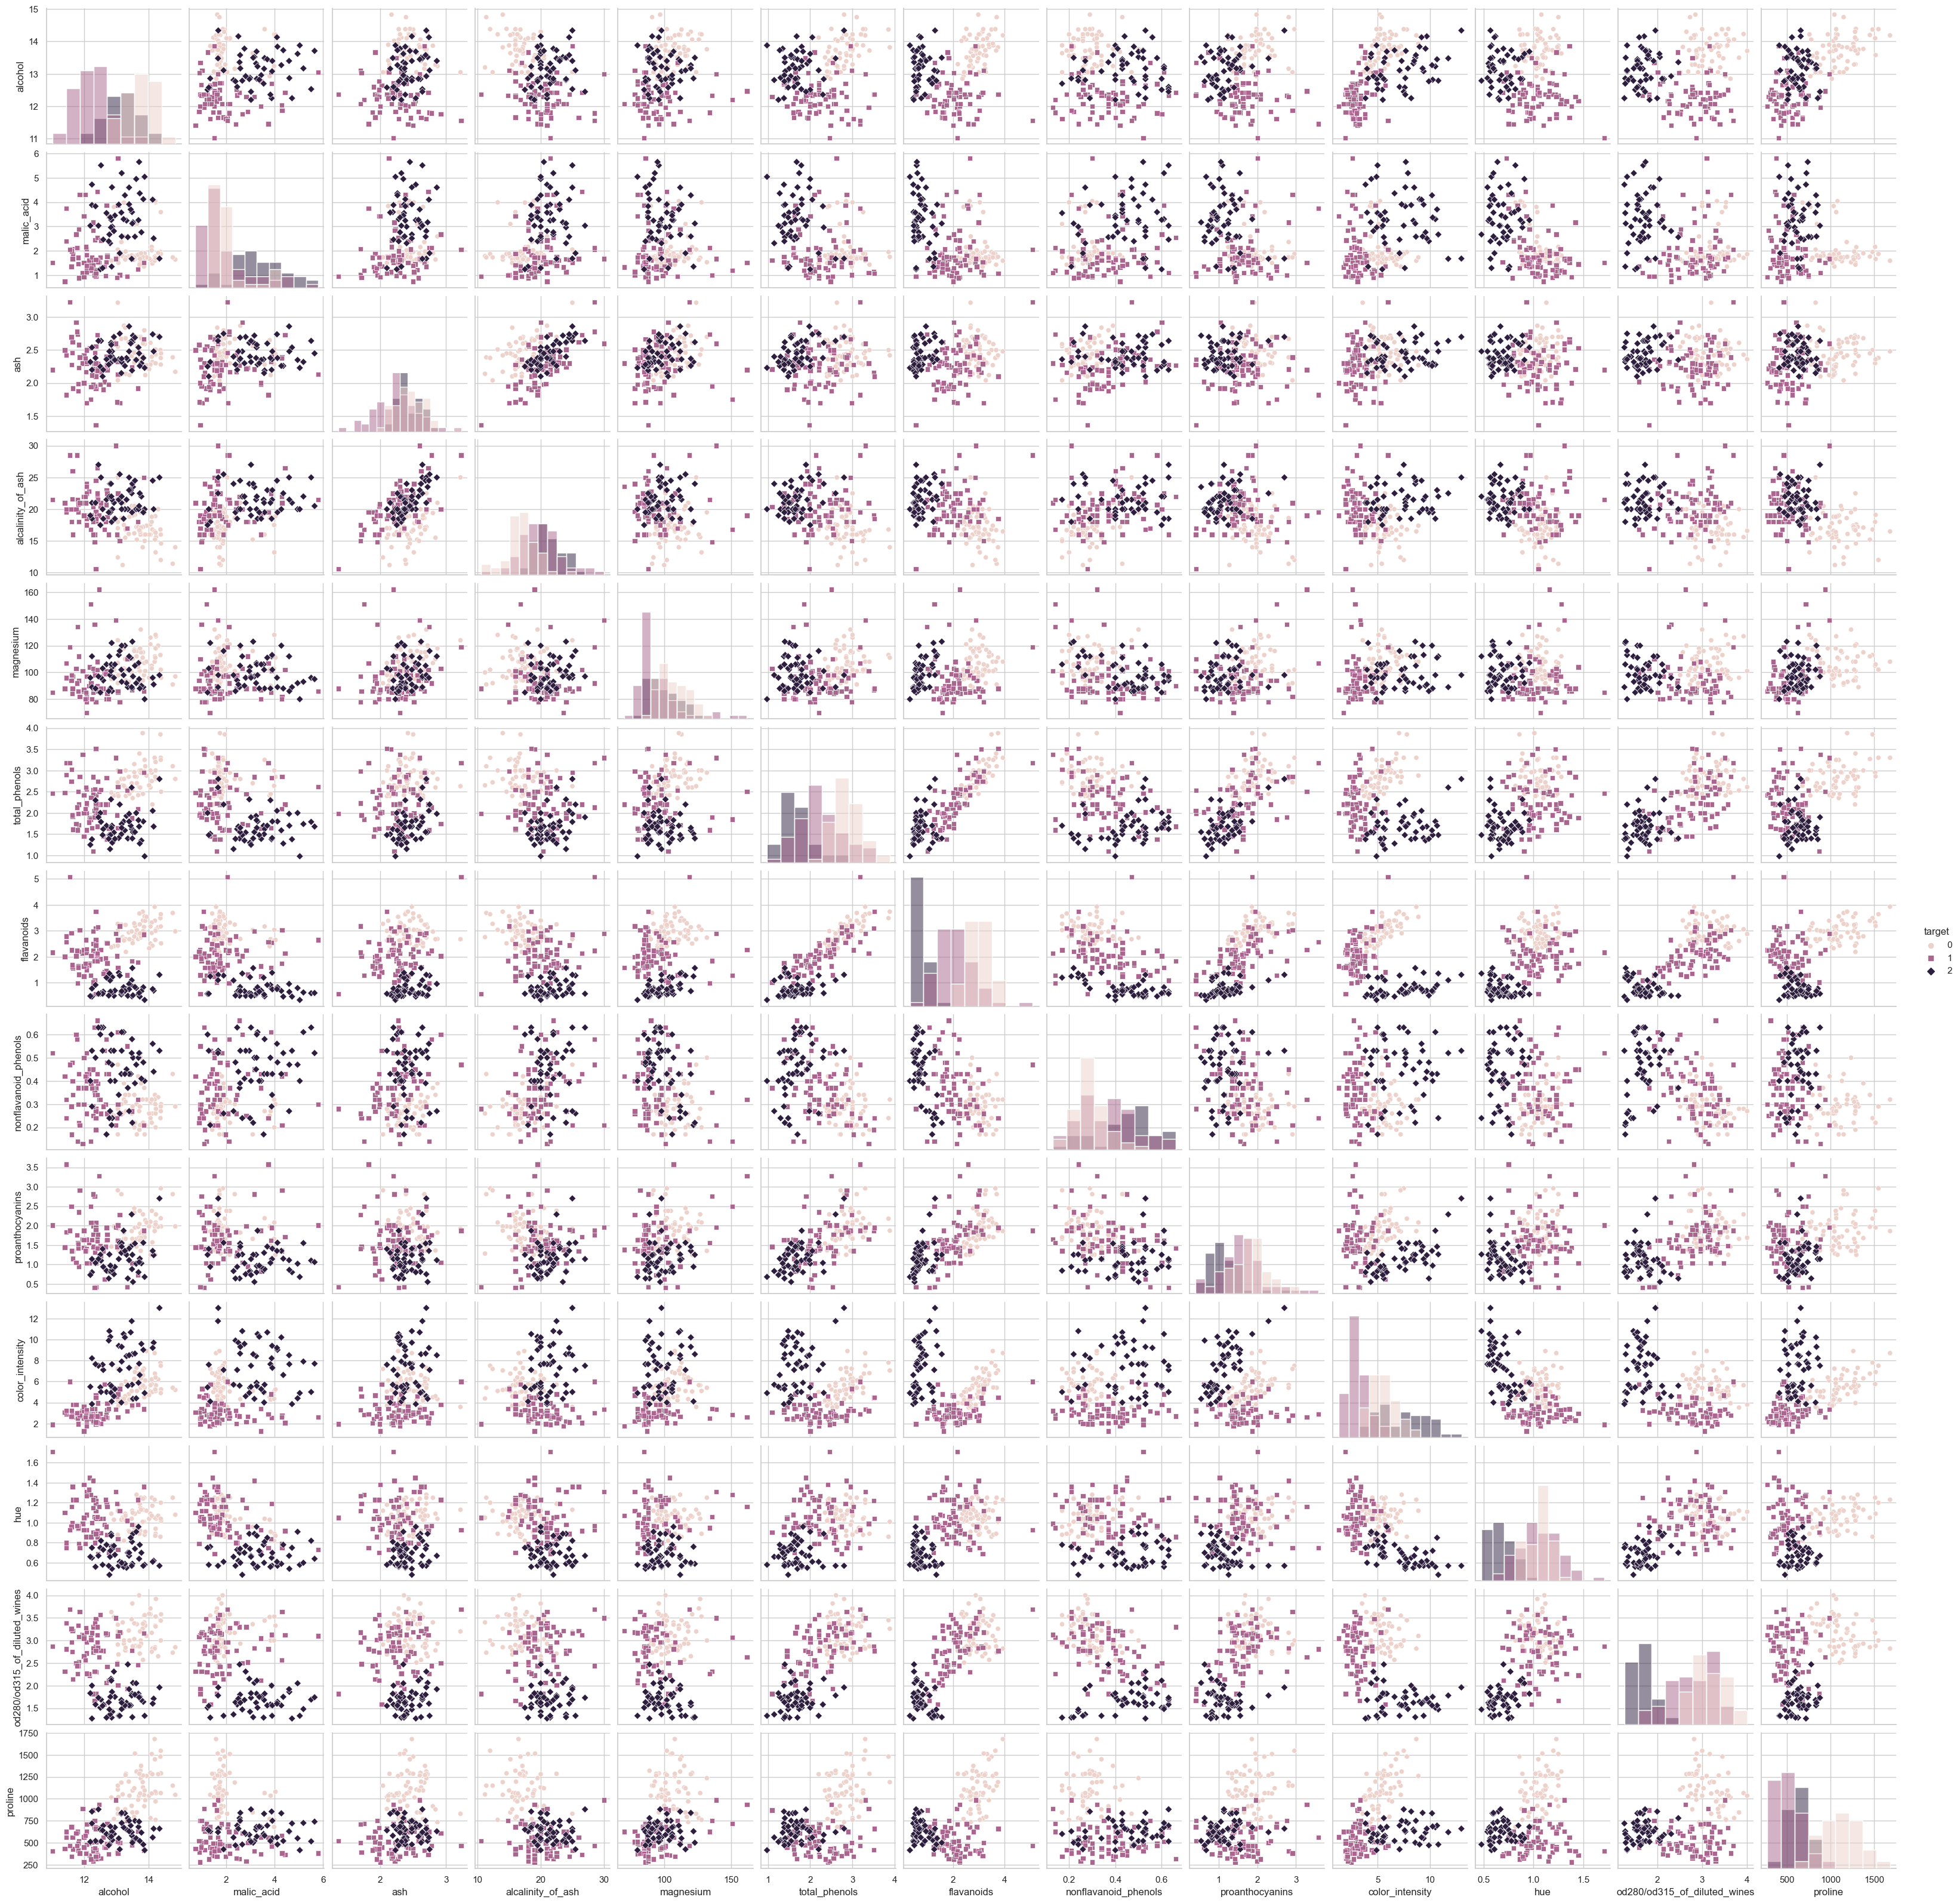

In [6]:
import seaborn as sns

def plot_pairplot(wine_df):
    sns.pairplot(wine_df, hue='target', diag_kind='hist', markers=["o", "s", "D"])
    plt.show()

plot_pairplot(wine_df)


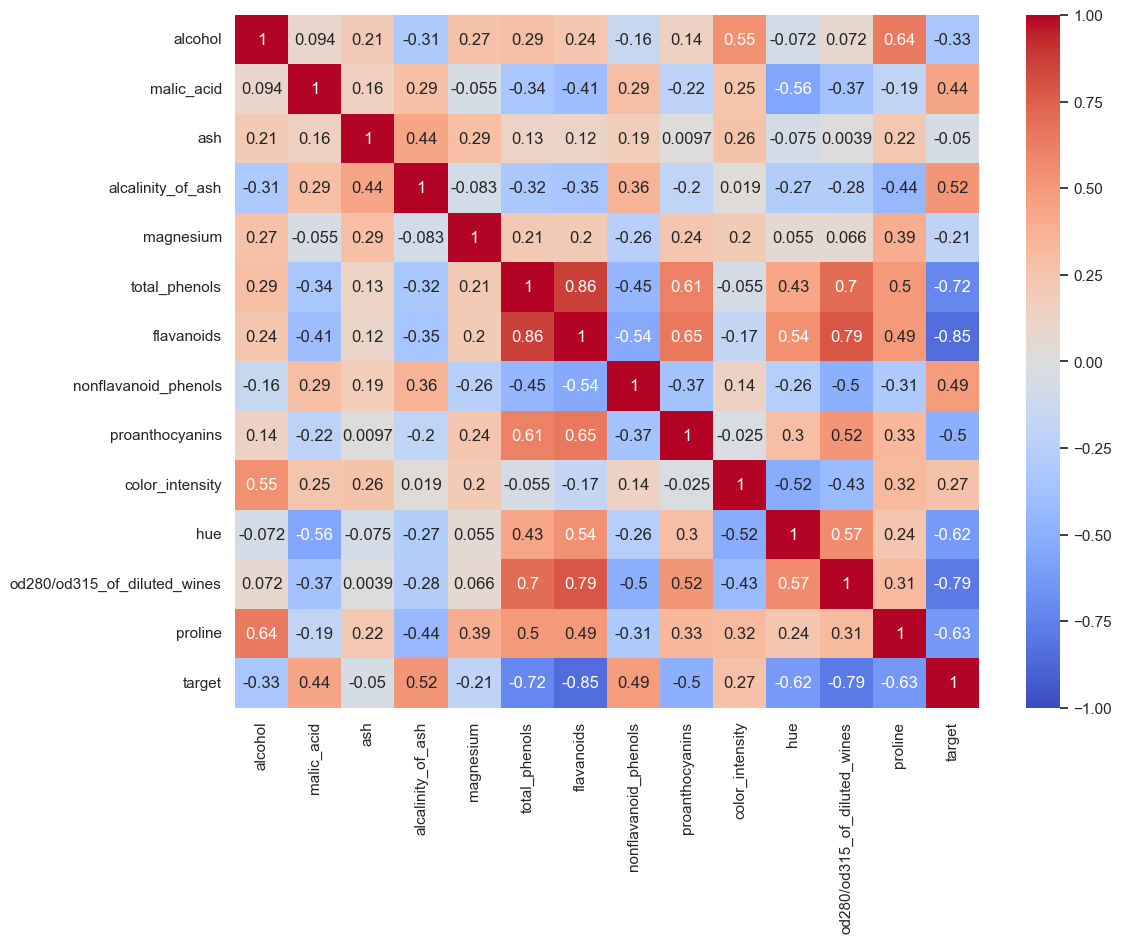

In [7]:
import matplotlib.pyplot as plt

def plot_heatmap(wine_df):
    corr = wine_df.corr()
    plt.figure(figsize=(12, 9))
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.show()

plot_heatmap(wine_df)


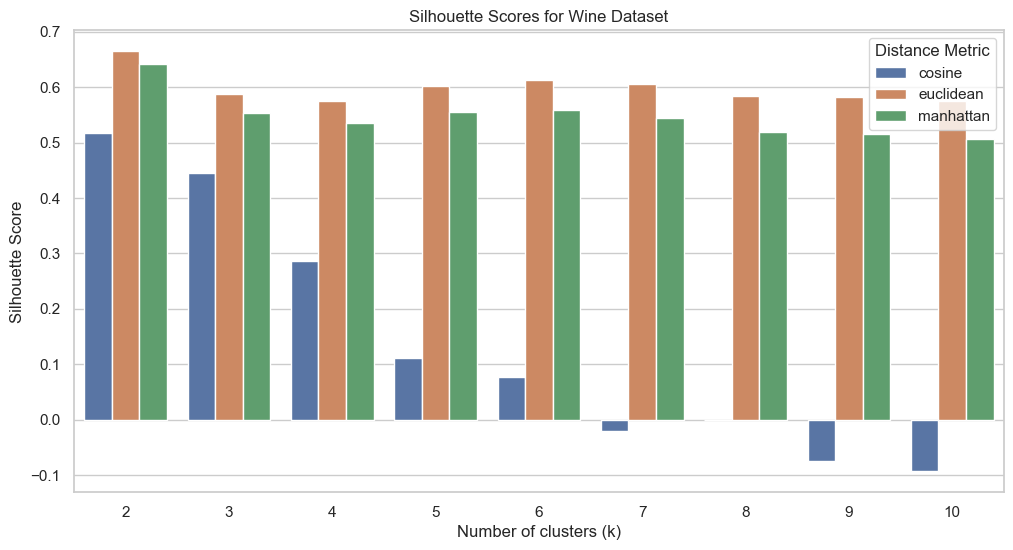

In [8]:
def plot_bar(results_df, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    ax = sns.barplot(
        x="k",
        y="silhouette_score",
        hue="distance_metric",
        data=results_df,
        palette="deep"
    )

    ax.set(xlabel="Number of clusters (k)", ylabel="Silhouette Score")
    plt.title(title)
    plt.legend(title="Distance Metric")
    plt.show()

plot_bar(wine_results, "Silhouette Scores for Wine Dataset")
